In [88]:
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as plt


%matplotlib inline

##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [105]:
X = np.random.random(1000)*np.random.randint(1,100,1000)
X[:10]

array([ 68.6948811 ,  77.97890754,   6.126874  ,   4.96322808,
        13.39377084,   1.24530211,   2.22400203,  11.96021391,
         5.80021857,  19.20030365])

In [106]:
y = 2 + 5* np.log(X) + np.random.random(1000)
len(y)

1000

In [76]:
poly = PolynomialFeatures()
X2 = poly.fit_transform(X.reshape(X.shape[0],1))
X2.shape

(1000, 3)

In [78]:
lr_model2 = LinearRegression()
lr_model2.fit(X2,y)
lr_model2.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

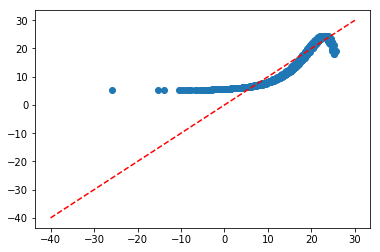

In [80]:
y_lr2_predict = lr_model2.predict(X2)
plt.scatter(y,y_lr2_predict)
plt.plot(np.linspace(-40,30,10000),np.linspace(-40,30,10000),'r--')

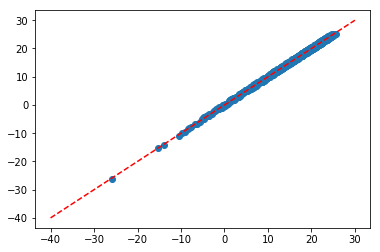

In [81]:
X3 = np.log(X)

lr_model3 = LinearRegression()
lr_model3.fit(X3.reshape(-1,1),y)
lr_model3.score

y_lr3_predict = lr_model3.predict(X3.reshape(-1,1))
plt.scatter(y,y_lr3_predict)
plt.plot(np.linspace(-40,30,10000),np.linspace(-40,30,10000),'r--')

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [56]:
y2 = 2 + 7* X + 3*(X**2) + np.random.random(1000)
len(y2)

1000

In [83]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = .25)
print(len(X_train), len(X_test), len(y2_train), len(y2_test))

750 250 750 250


In [86]:
lr_model2 = LinearRegression()
lr_model2.fit(X2_train,y2_train)
lr_model2.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

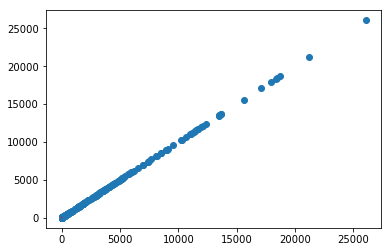

In [87]:
y2_lr2_predict = lr_model2.predict(X2_test)
plt.scatter(y2_test,y2_lr2_predict)
plt.plot(np.linspace(-40,30,10000),np.linspace(-40,30,10000),'r--')

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [98]:
# !pip install statsmodels
import statsmodels.api as sm

/Users/Chuoran/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [114]:
poly = PolynomialFeatures(degree = 2)

In [117]:
X.shape

(1000,)

In [118]:
poly.fit_transform(X.reshape(-1, 1)).shape

(1000, 3)

In [113]:
poly.fit_transform(X.reshape(-1, 1)).shape

(1000, 1)

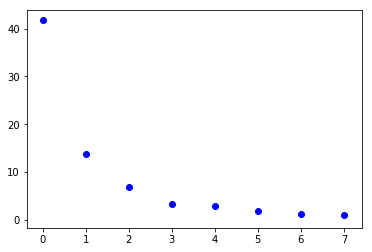

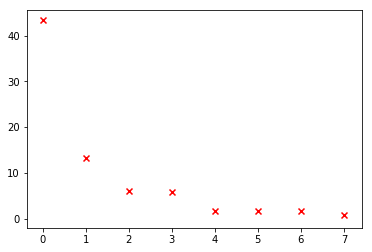

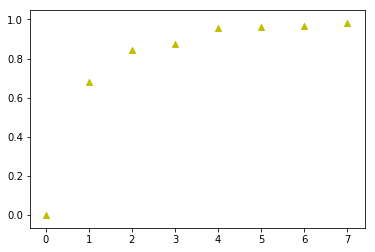

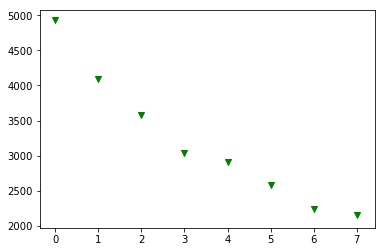

In [143]:
for i in range(8):
    
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
#     X.shape
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = .25)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    y_pred_train = lr_model.predict(X_train)    
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = lr_model.predict(X_test)
    te_error = mean_squared_error(y_test, y_pred_test)
    
    r2 = lr_model.score(X_test,y_test)
    
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    AIC = fit.aic
    
    
    plt.figure(0)
    plt.scatter(i, tr_error, c = 'b', marker = 'o')
    
    plt.figure(1)
    plt.scatter(i, te_error, c = 'r', marker = 'x')
    
    plt.figure(2)
    plt.scatter(i, r2, c = 'y', marker = '^')
    
    plt.figure(3)
    plt.scatter(i, AIC, c = 'g', marker = 'v')
    

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

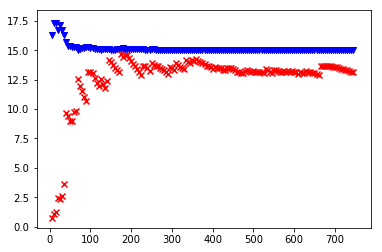

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25)

for m in range(5, len(X_train),5):
    X_train_m = X_train[:m].reshape(-1,1)
    y_train_m = y_train[:m]
#     X_train_m=pd.DataFrame(X_train[:m])
#     y_train_m=pd.DataFrame(y_train[:m]) 
    
    
    lr_model = LinearRegression()
    lr_model.fit(X_train_m, y_train_m)
    
    y_pred_train_m = lr_model.predict(X_train_m)    
    tr_error_m = mean_squared_error(y_train_m, y_pred_train_m)
    
    y_pred_test = lr_model.predict(X_test.reshape(-1,1))
    te_error = mean_squared_error(y_test, y_pred_test)
    
    plt.scatter(m, tr_error_m, c = 'r', marker = 'x')
    plt.scatter(m, te_error, c = 'b', marker = 'v')